# SymPy notebook
## This is a note about learning SymPy library
## http://docs.sympy.org/latest/index.html

# import sympy and other library

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
sympy.plotting
%matplotlib inline

## pretty printing (as latex) setting

In [2]:
sympy.init_printing()

# define variables

In [3]:
x, y, k, t = sympy.symbols('x y k t')

# symbolic expression

## sqrt example

In [4]:
sympy.sqrt(9)

In [5]:
sympy.sqrt(8)

# derivative

In [6]:
expr = sympy.sin(k*x)
expr

In [7]:
sympy.diff(expr, x)

In [8]:
sympy.diff(expr, x, x)

# integrate

In [9]:
expr = sympy.exp(x)*sympy.sin(x) + sympy.exp(x)*sympy.cos(x)
expr

In [10]:
sympy.integrate(expr, x)

In [11]:
expr = sympy.sin(sympy.pi*x)
expr

In [12]:
sympy.integrate(expr, (x, 0, 1))

# limit

In [13]:
sympy.limit(sympy.sin(2*x)/x, x, 0)

# slove equation

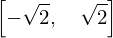

In [14]:
sympy.solve(x**2 - 2, x)

# ODE

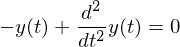

In [15]:
sympy.Eq(y(t).diff(t, t) - y(t))

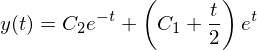

In [16]:
sympy.dsolve(sympy.Eq(y(t).diff(t, t) - y(t), sympy.exp(t)), y(t))

In [17]:
eq = sympy.Eq(y(t).diff(t) - y(t))

In [18]:
sympy.dsolve(eq, y(t))

# print latex forma

In [19]:
sympy.latex(sympy.Integral(sympy.cos(x)**2, (x, 0, sympy.pi)))

'\\int_{0}^{\\pi} \\cos^{2}{\\left (x \\right )}\\, dx'

In [20]:
%%latex
$\int_{0}^{\pi} \cos^{2}{\left (x \right )}\, dx$

<IPython.core.display.Latex object>

In [21]:
pwd

u'/Users/ap9035/Documents/ScientificComputing/sympy'

# substitute symbol with value

In [22]:
expr = x+y**2
expr

## method 1

In [23]:
expr.subs({x:2, y:3})

## method 2

In [24]:
expr.subs(x, 2)

## method 3

In [25]:
expr.subs([(x, 2), (y, 3)])

# Symbolic Equation
## using sympy.Eq to create equation

In [26]:
eq1 = sympy.Eq(x**2, 1)
eq1

In [27]:
sympy.solve(eq1, x)

# Equals signs

In [28]:
eq1 = (x+y)**2
eq1

In [29]:
eq2 = x**2+2*x*y+y**2
eq2

In [30]:
sympy.simplify(eq1-eq2)

In [31]:
eq1.equals(eq2)

True

# Cover string to SymPy expressions

In [32]:
# a and b must define first
a, b = sympy.symbols('a b')
express_string = "a**2+b**2+5"
expr = sympy.simplify(express_string)

In [33]:
expr

In [34]:
expr.subs(a, 2)

# Evaluate SymPy expressions into float number

In [35]:
expr.subs([(a, 2), (b, 3)]).evalf()

In [36]:
sympy.pi.evalf(100)

# lambdify

In [37]:
expr = a**2+b
expr

In [38]:
f = sympy.lambdify([a, b], expr, "numpy")

In [39]:
a = np.arange(5)
b = 1
print a
print b
f(a, b)

[0 1 2 3 4]
1


array([ 1,  2,  5, 10, 17])

# plotting function
http://docs.sympy.org/dev/modules/plotting.html

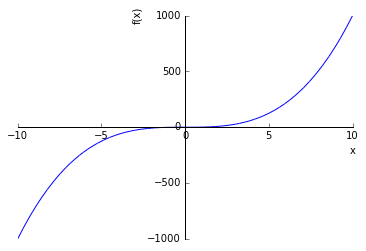

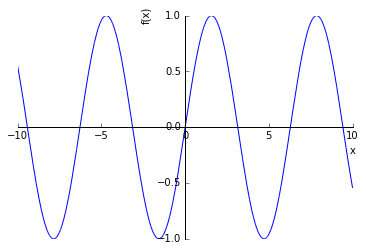

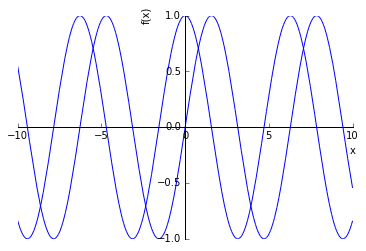

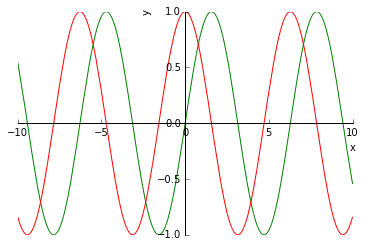

In [48]:
p1 = sympy.plotting.plot(x**3)
p2 = sympy.plotting.plot(sympy.sin(x))
p3 = sympy.plotting.plot(sympy.sin(x), sympy.cos(x))
p3[0].line_color = 'green'
p3[1].line_color = 'red'
p3.xlabel='x'
p3.ylabel='y'
p3.show()

# random variable
http://docs.sympy.org/latest/modules/stats.html

## sympy.stats.Die(name, items)
## Create a dice which have [items] face

In [105]:
from sympy.stats import Die, density, Normal, Uniform
from sympy import symbols, Symbol

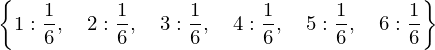

In [65]:
D6 = Die('D6', 6)
density(D6).dict

## sympy.stats.Normal(name, mean, std)
## normal distrubution

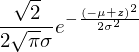

In [197]:
z, mu = symbols('z mu')
sigma = Symbol("sigma", positive=True)
X = Normal("X", mu, sigma)
expr = density(X)(z)
expr

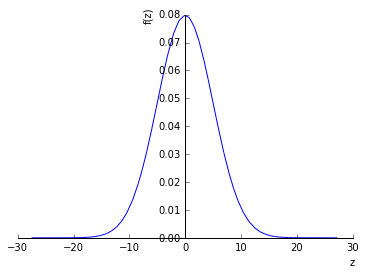

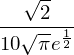

In [210]:
ee = expr.subs([(mu, 0), (sigma, 5)])
sympy.plot(ee, (z, -30, 30))
ee.subs(z, 5)

In [198]:
sympy.integrate(expr, (z, -sympy.oo, mu))

# Uniform distrubution

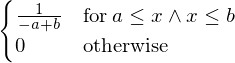

In [180]:
a = Symbol("a", negative=True)
b = Symbol("b", positive=True)
X = Uniform("x", a, b)
expr = density(X)(x)
expr

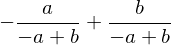

In [181]:
sympy.integrate(expr, (x, a, b))

In [182]:
sympy.simplify(sympy.integrate(expr, (x, a, b)))

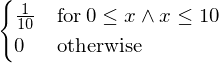

In [195]:
expr2 = expr.subs([(a, 0), (b, 10)])
expr2

In [193]:
sympy.simplify(expr2)
print type(expr2)

<class 'sympy.core.power.Pow'>


/usr/local/lib/python2.7/site-packages/sympy/plotting/experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


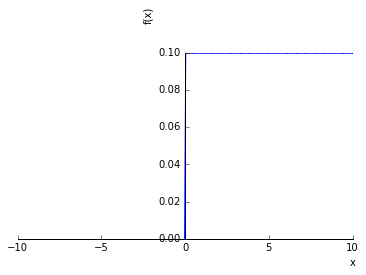

In [196]:
p2 = sympy.plotting.plot(expr2, (x, -10, 10),adaptive=False, num_of_points=200 )